In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import joblib

data = pd.read_csv('deliverytime.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    for column in categorical_columns:
        # Before encoding
        print(f"Unique values in column '{column}' before encoding: {df[column].unique()}")
        
        # Apply label encoding
        df[column] = label_encoder.fit_transform(df[column])
        
        # After encoding
        print(f"Encoded values in column '{column}': {df[column].unique()}")
    
# Call the label_encoding function
label_encoding(data)


Unique values in column 'ID' before encoding: ['4607' 'B379' '5D6D' ... '4F8D' '5EEE' '5FB2']
Encoded values in column 'ID': [11154 34817 16196 ... 13178 16526 16686]
Unique values in column 'Delivery_person_ID' before encoding: ['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']
Encoded values in column 'Delivery_person_ID': [637 232 234 ... 792 260 491]
Unique values in column 'Type_of_order' before encoding: ['Snack ' 'Drinks ' 'Buffet ' 'Meal ']
Encoded values in column 'Type_of_order': [3 1 0 2]
Unique values in column 'Type_of_vehicle' before encoding: ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']
Encoded values in column 'Type_of_vehicle': [2 3 1 0]


In [3]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

# Define a function to calculate the distance using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers

    return distance

In [4]:

# Calculate the distance for each entry in the dataset
data['Distance (km)'] = data.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

# Print the first few rows of the dataset with the distance column added
print(data.head())

      ID  Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  11154                 637                   37                      4.9   
1  34817                 232                   34                      4.5   
2  16196                 234                   23                      4.4   
3  22479                 397                   38                      4.7   
4  20419                 333                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Type_of_order  Type_of_vehicle  \
0       

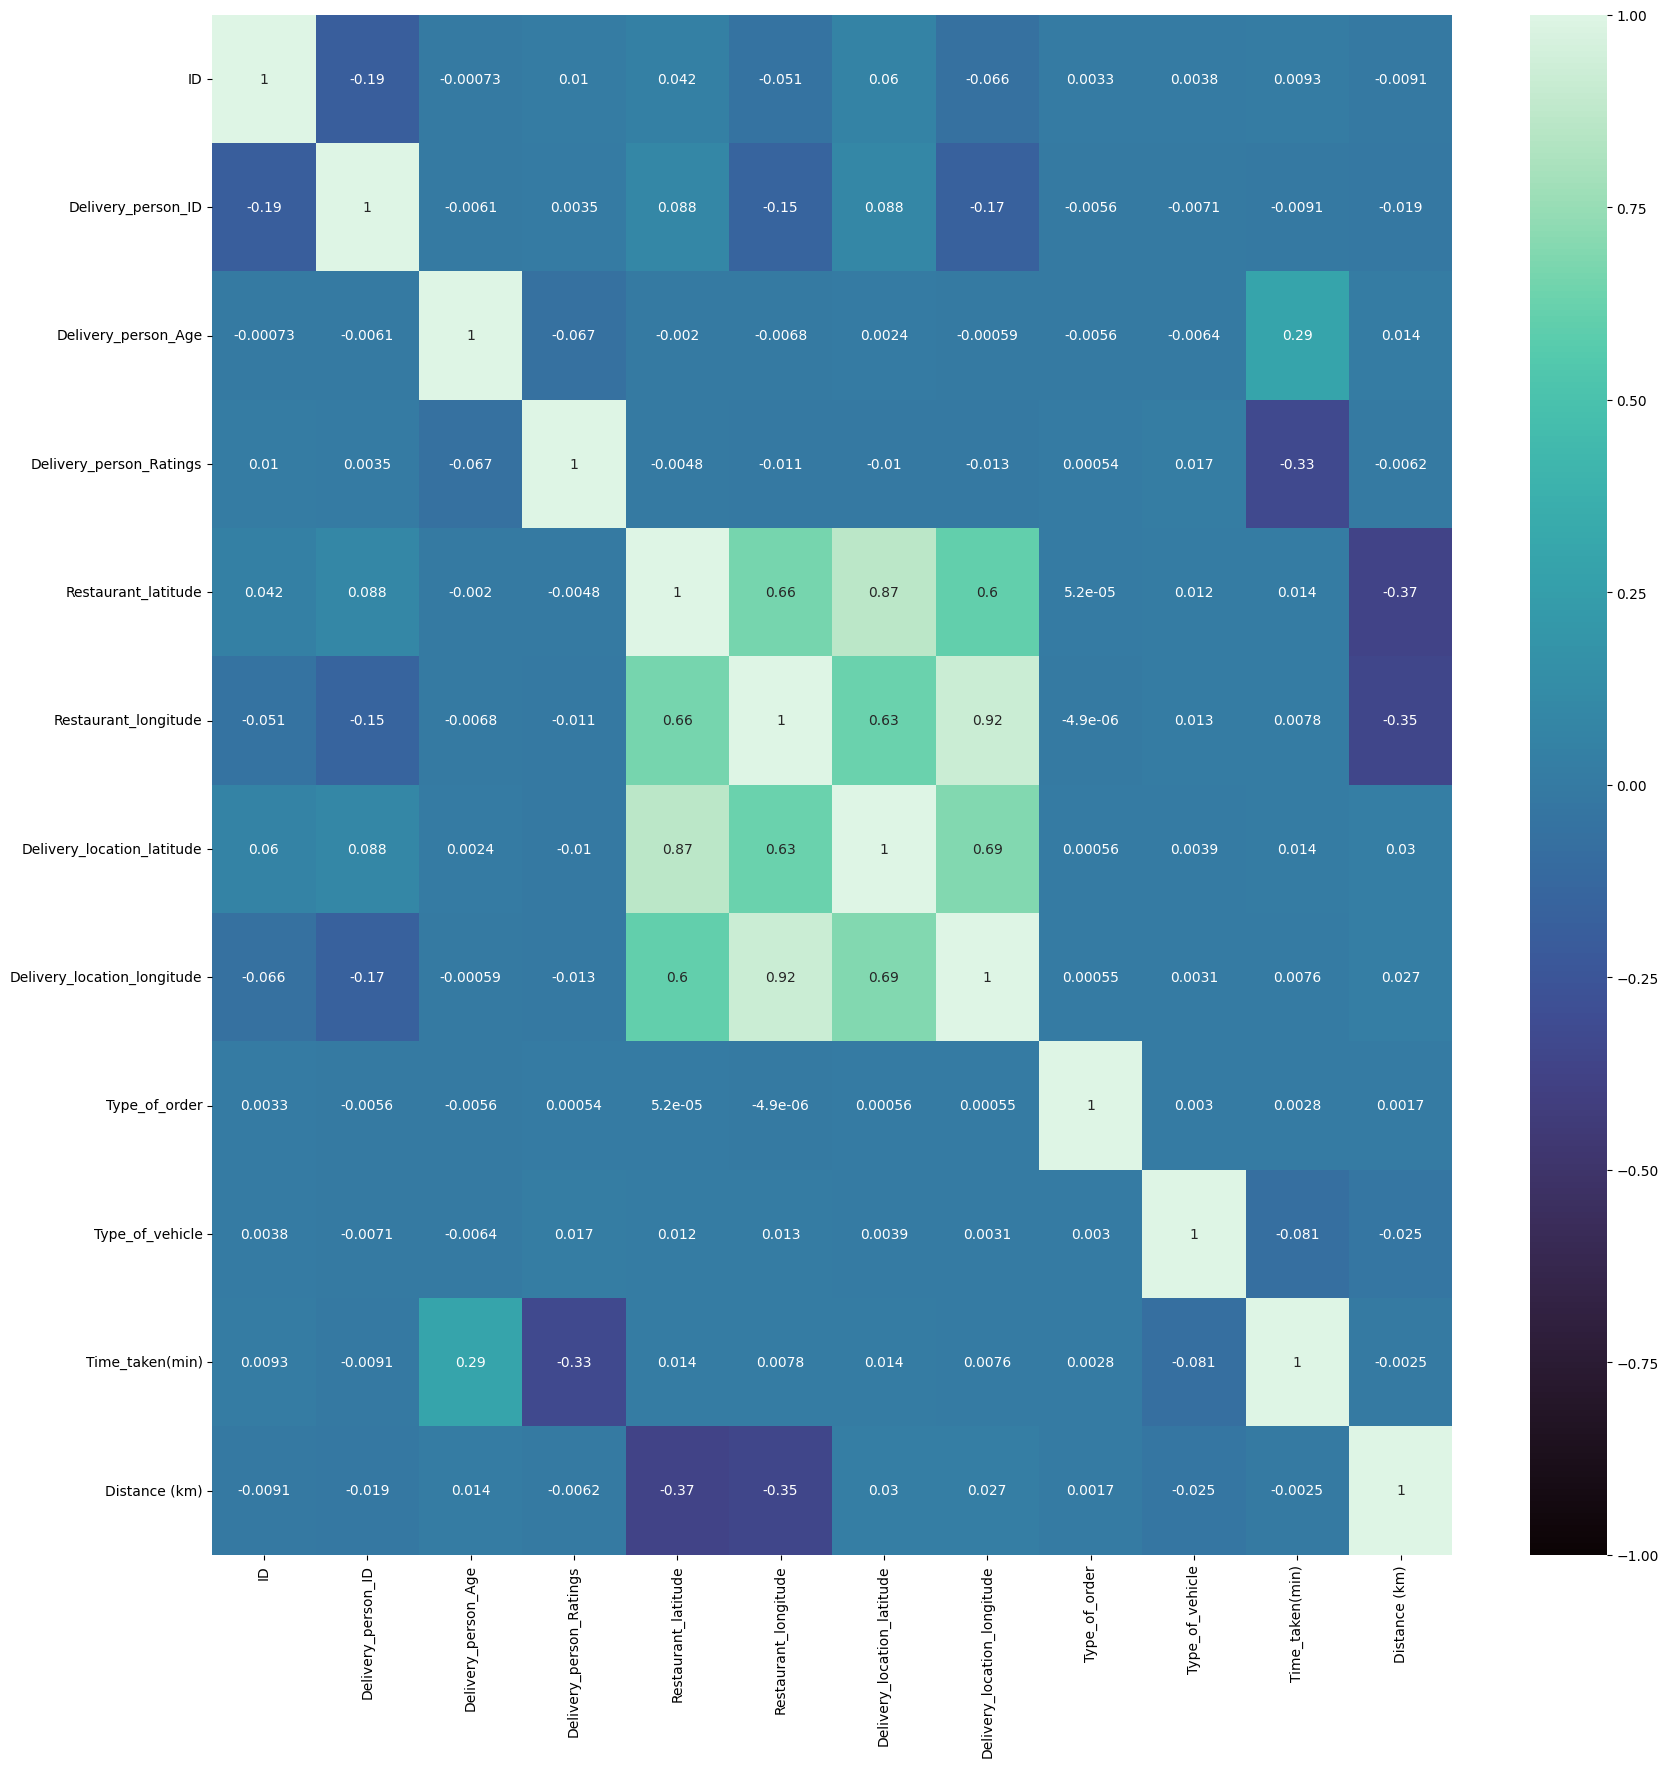

In [5]:


# vorrelations visulization
corr = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [6]:
# splitting
y = data['Time_taken(min)']
X = data.drop(['Time_taken(min)'], axis=1)
X.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Distance (km)
0,11154,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,3.025149
1,34817,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,20.183530
2,16196,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,1.552758
3,22479,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,7.790401
4,20419,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,6.210138


In [7]:
y.head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the pipeline with StandardScaler and XGBRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for preprocessing
    ('xgb', XGBRegressor(n_estimators=20, max_depth=5))  # XGBRegressor for modeling
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate on the testing data
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 5.69603942419845


In [10]:
import joblib

# Save the trained model to a file
joblib.dump(pipe, 'task2fooddelivery.pkl')

['task2fooddelivery.pkl']